## importing libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

In [ ]:
# 

## Manipulate Data...

In [2]:
train_df = pd.read_csv("Corona_NLP_train.csv",encoding='latin1')
test_df = pd.read_csv("Corona_NLP_test.csv",encoding='latin1')

train_df.sample(10)

UserName  ScreenName                 Location     TweetAt  \
39260     43059       88011               Carmel, CA  12-04-2020   
1323       5122       50074        I'm right here!!!  17-03-2020   
16202     20001       64953                  USA ??   22-03-2020   
21509     25308       70260                      NaN  25-03-2020   
20823     24622       69574       Greater Manchester  25-03-2020   
13424     17223       62175  England, United Kingdom  21-03-2020   
10755     14554       59506                      NaN  20-03-2020   
9016      12815       57767         Los Angeles , CA  20-03-2020   
23604     27403       72355         Northern England  26-03-2020   
25833     29632       74584                    Kenya  01-04-2020   

                                           OriginalTweet           Sentiment  
39260  6) Duration - how long will #Covid_19 last, an...  Extremely Positive  
1323   People still buying 2 lots of 24 pack of toile...             Neutral  
16202  @Customer653 @DollarTree This was NOT taken at...             Neutral  
21509  COVID 19 As you rush to stock food amp drive u...            Positive  
20823  I AM NOT IMMUNE TO THE CORONAVIRUS JUST BECAUS...            Negative  
13424  Just been to my local supermarket and all that...            Positive  
10755  my nan lives in Spain and she went to the supe...             Neutral  
9016   Retail Response to #COVID19: Innovation in Rea...            Positive  
23604        A day in the life of a supermarket worker               Neutral  
25833  Washing our hands with soap and water is our c...            Negative

In [3]:
# cheking the shape of data....
print(f"Train data-set has {train_df.shape[0]} rows and {train_df.shape[1]} columns \n")
print(f"Test data-set has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Train data-set has 41157 rows and 6 columns 

Test data-set has 3798 rows and 6 columns


In [4]:
# checking the dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [41]:
# checking null values...
train_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
Length              0
dtype: int64

In [6]:
# checking the label proportion around the data...
labels_prop = train_df["Sentiment"].value_counts()
labels_prop

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

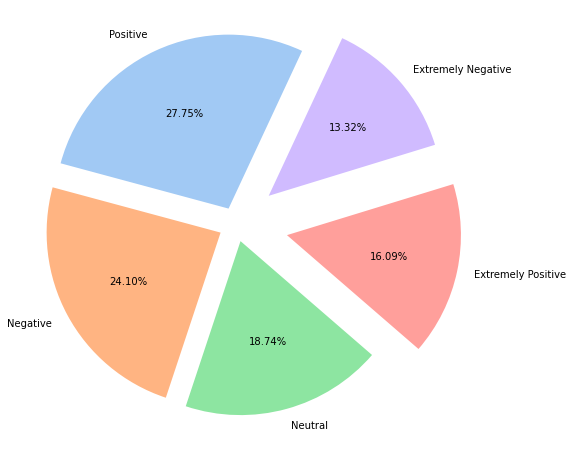

In [7]:
# let's visualize it...
labels = labels_prop.index
colors = sns.color_palette('pastel') # pastel colors
plt.figure(figsize=(10,8))
plt.pie(labels_prop,labels=labels,colors=colors,explode=[0.1,0.1,0.1,0.3,0.25],startangle=65,autopct="%0.2f%%");

In [8]:
# let's visualize the location....
location_prop = train_df["Location"].value_counts()
location_prop

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

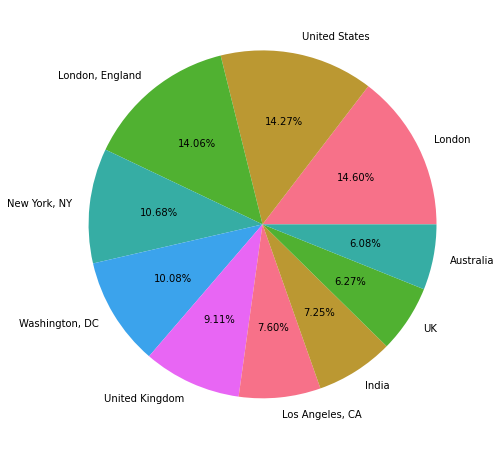

In [9]:
#  just visualize the top 10 location of the data....
labels = location_prop.index[:10]
colors = sns.color_palette("husl")
plt.figure(figsize=(10,8))
plt.pie(location_prop[:10],labels=labels,colors=colors,autopct="%.2f%%",);

In [10]:
# calculate the tweet length
train_df["Length"] = train_df["OriginalTweet"].apply(len)
train_df.sample(10)

UserName  ScreenName                      Location     TweetAt  \
34438     38237       83189                           NaN  08-04-2020   
9021      12820       57772                           NaN  20-03-2020   
1900       5699       50651                 Woodstock, GA  17-03-2020   
30538     34337       79289  East Kilbride, Scotland, UK   06-04-2020   
24370     28169       73121                     Baltimore  26-03-2020   
6014       9813       54765                        Canada  19-03-2020   
9460      13259       58211                       Bristol  20-03-2020   
29238     33037       77989            MontrÃ©al, QuÃ©bec  05-04-2020   
9033      12832       57784                   CountrY BoY  20-03-2020   
25331     29130       74082               Chattanooga, TN  31-03-2020   

                                           OriginalTweet           Sentiment  \
34438  @kmoxnews I am not the "get-off-my-lawn guy," ...  Extremely Negative   
9021   Sorry to say but we as Muslims are the worst h...  Extremely Negative   
1900   The retail store I work for has submitted a re...            Negative   
30538  BBC News - Waitrose staff told to make up time...             Neutral   
24370  really fascinating how HEB, a supermarket chai...  Extremely Positive   
6014   @muskokajen Hi Jen, we're very sorry for the d...            Negative   
9460   Food shopping used to be simple order your foo...            Positive   
29238  Going to the grocery store isnÂt fun anymore?...            Positive   
9033   The USA to close pups,restaurant and supermark...             Neutral   
25331  Spent the morning with a group from church vol...            Negative   

       Length  
34438     180  
9021      231  
1900      266  
30538      84  
24370     150  
6014      255  
9460      163  
29238     178  
9033       97  
25331     181

<Figure size 720x720 with 0 Axes>

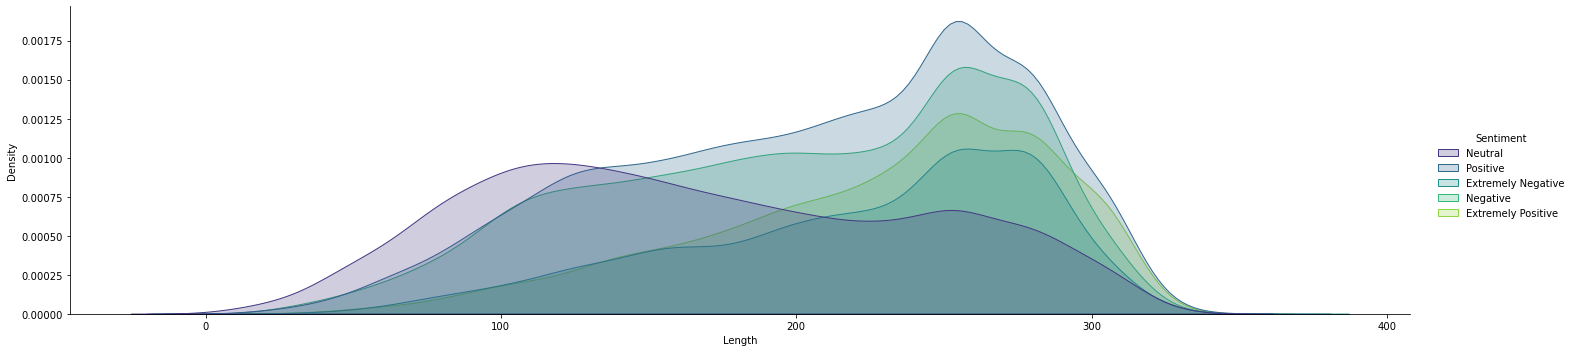

In [11]:
# visualize the tweet length accross the data-set...
plt.figure(figsize=(10,10))
sns.displot(data=train_df,x="Length",hue="Sentiment",
                 kind = 'kde', fill = True,  aspect =4 , palette = "viridis");


In [12]:
# changing the tweet text dtype
train_df["OriginalTweet"] = train_df["OriginalTweet"].astype("string")

In [13]:
train_df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    string
Sentiment        object
Length            int64
dtype: object

In [15]:
# changing the datetime dtype ...
train_df["TweetAt"] = pd.to_datetime(train_df["TweetAt"],format="%d-%m-%Y")
train_df.head(5)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754        NaN 2020-03-16   
4      3803       48755        NaN 2020-03-16   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

   Length  
0     111  
1     237  
2     131  
3     306  
4     310

In [16]:
train_df["TweetAt"].min()

Timestamp('2020-03-16 00:00:00')

In [17]:
train_df["TweetAt"].max()

Timestamp('2020-04-14 00:00:00')

In [18]:
# checking the tweets per day
tweet_per_day  = train_df.groupby(train_df["TweetAt"]).count()["Sentiment"]
tweet_per_day = tweet_per_day.reset_index()
tweet_per_day

TweetAt  Sentiment
0  2020-03-16        656
1  2020-03-17       1977
2  2020-03-18       2742
3  2020-03-19       3215
4  2020-03-20       3448
5  2020-03-21       2653
6  2020-03-22       2114
7  2020-03-23       2062
8  2020-03-24       1480
9  2020-03-25       2979
10 2020-03-26       1277
11 2020-03-27        345
12 2020-03-28         23
13 2020-03-29        125
14 2020-03-30         87
15 2020-03-31        316
16 2020-04-01        630
17 2020-04-02        954
18 2020-04-03        810
19 2020-04-04        767
20 2020-04-05       1131
21 2020-04-06       1742
22 2020-04-07       1843
23 2020-04-08       1881
24 2020-04-09       1471
25 2020-04-10       1005
26 2020-04-11        909
27 2020-04-12        803
28 2020-04-13       1428
29 2020-04-14        284

In [19]:
tweet_per_day["Month"] = tweet_per_day["TweetAt"].apply(lambda x : x.month)
tweet_per_day

TweetAt  Sentiment  Month
0  2020-03-16        656      3
1  2020-03-17       1977      3
2  2020-03-18       2742      3
3  2020-03-19       3215      3
4  2020-03-20       3448      3
5  2020-03-21       2653      3
6  2020-03-22       2114      3
7  2020-03-23       2062      3
8  2020-03-24       1480      3
9  2020-03-25       2979      3
10 2020-03-26       1277      3
11 2020-03-27        345      3
12 2020-03-28         23      3
13 2020-03-29        125      3
14 2020-03-30         87      3
15 2020-03-31        316      3
16 2020-04-01        630      4
17 2020-04-02        954      4
18 2020-04-03        810      4
19 2020-04-04        767      4
20 2020-04-05       1131      4
21 2020-04-06       1742      4
22 2020-04-07       1843      4
23 2020-04-08       1881      4
24 2020-04-09       1471      4
25 2020-04-10       1005      4
26 2020-04-11        909      4
27 2020-04-12        803      4
28 2020-04-13       1428      4
29 2020-04-14        284      4

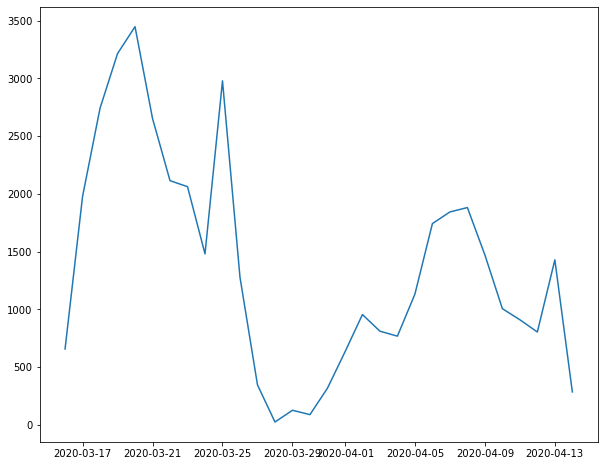

In [20]:
# let's visualize tweet per day..
plt.figure(figsize=(10,8))
plt.plot(tweet_per_day["TweetAt"],tweet_per_day["Sentiment"]);

In [21]:
train_df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

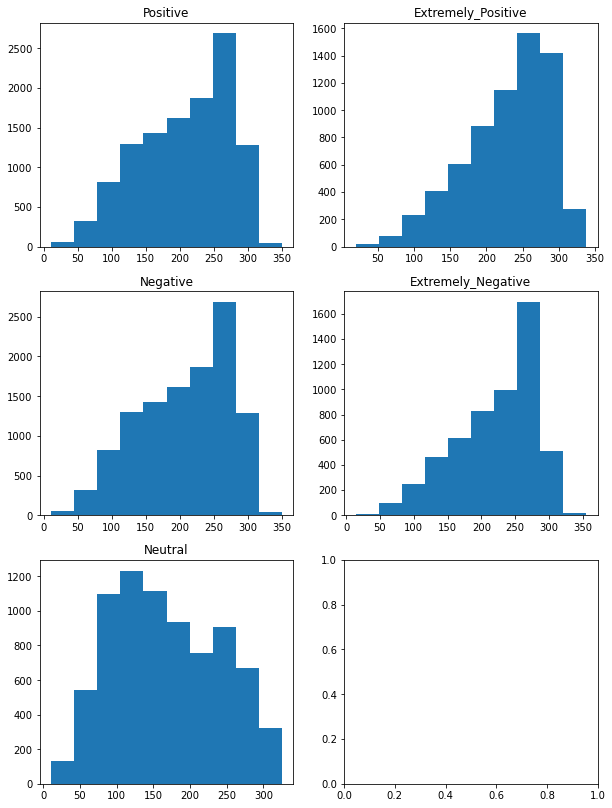

In [37]:
# plotting the number of characters per sentiment
len_neutral = train_df[train_df["Sentiment"]=="Neutral"]["OriginalTweet"].str.len()

# positive sentiment 
len_positive = train_df[train_df["Sentiment"]=="Positive"]["OriginalTweet"].str.len()

# negative sentiment 
len_negative = train_df[train_df["Sentiment"]=="Positive"]["OriginalTweet"].str.len()

# extremely negative 
len_ex_neg = train_df[train_df["Sentiment"]=="Extremely Negative"]["OriginalTweet"].str.len()

# extremely positive
len_ex_pos = train_df[train_df["Sentiment"]=="Extremely Positive"]["OriginalTweet"].str.len()

# let's plot the len of characters in each sentiment category....
# plt.figure(figsize=(10,8))
figure,ax = plt.subplots(3,2,figsize=(10,14))
ax[0,0].hist(len_positive)
ax[0,0].set_title("Positive")

ax[0,1].hist(len_ex_pos)
ax[0,1].set_title("Extremely_Positive")

ax[1,0].hist(len_negative)
ax[1,0].set_title("Negative")

ax[1,1].hist(len_ex_neg)
ax[1,1].set_title("Extremely_Negative")

ax[2,0].hist(len_neutral)
ax[2,0].set_title("Neutral")

plt.show()

In [38]:
train_df[train_df["Sentiment"]== "Positive"]["Length"]

1        237
2        131
3        306
5        250
6        180
        ... 
41140    302
41145    105
41146    290
41150    199
41154    136
Name: Length, Length: 11422, dtype: int64

In [42]:
# change the sentiment type

def change_sen(sentiment):
    if sentiment == "Positive":
        return "positive"
    elif sentiment == "Extremely Positive":
        return "positive"
    elif sentiment == "Negative":
        return "negative"
    elif sentiment == "Extremely Negative":
        return "negative"
    else:
        return "neutral"

In [43]:
train_df["Sentiment"] = train_df["Sentiment"].apply(change_sen)
test_df["Sentiment"] = test_df["Sentiment"].apply(change_sen)

# let's check the changes
train_df["Sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


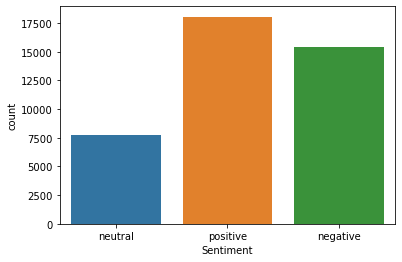

In [45]:
# plot it
sns.countplot(train_df["Sentiment"]);